# Project Business Statistics: E-news Express



# Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

##  Problem Statement and Objectives



 To decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.
 
 #Objective

1.Explore the dataset and extract insights using Exploratory Data Analysis.

2.Do the users spend more time on the new landing page than the existing landing page?

3.Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4.Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5.Is the time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

The idea behind answering these questions is to decide whether the new page is effective enough to gather new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.

## Import all the necessary libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. 

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [4]:
# write the code for reading the dataset abtest.csv
df = pd.read_csv('abtest.csv')


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [5]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [7]:
df.shape

(100, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

In [10]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [11]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [12]:
df.duplicated().sum()

0

# Five point summary of continuous variables

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


1.The user_id column contains the USER ID of the person visiting the page.

2.The maximum time spent on the landing page is less than 11 mins.

3.The mean time spent on the landing page is approximately 5.4 mins.

4.The median time spent on the landing page is 5.4 mins.

In [14]:
df.describe(include=['category']).T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


In [15]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [16]:
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

In [17]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [18]:
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

In [19]:
df['user_id'].value_counts()

546560    1
546473    1
546483    1
546482    1
546481    1
         ..
546590    1
546589    1
546588    1
546587    1
546559    1
Name: user_id, Length: 100, dtype: int64

Observations

There are 100 users in total.

There are 2 groups named control and treatment and each group has 50 users.

There are 2 landing_pages which are new and old.

54 users got converted and 46 users do not get converted after visiting the landing page.

There are 3 unique preferred languages - English, French, and Spanish.

### Univariate Analysis

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

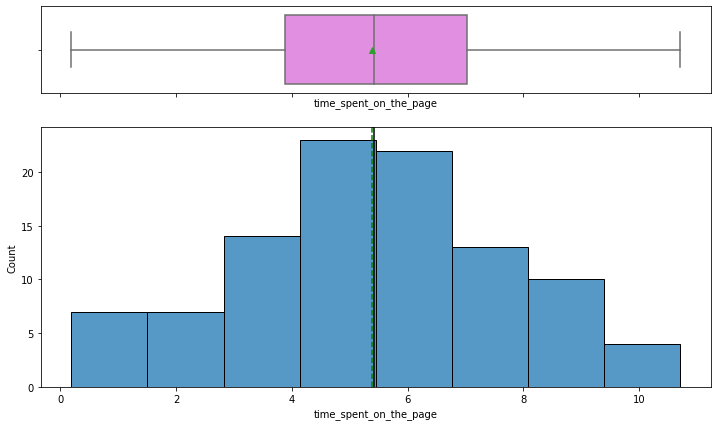

In [21]:
histogram_boxplot(df,"time_spent_on_the_page")

No outliers.

Median and mean are almost on the sameline.

Almost a normal distribution.

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

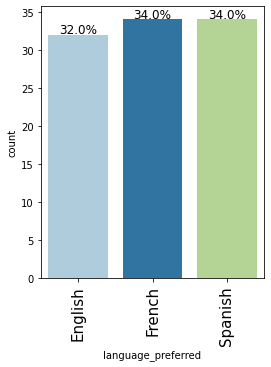

In [23]:
labeled_barplot(df, 'language_preferred', perc=True)

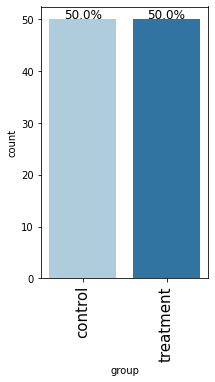

In [24]:
labeled_barplot(df,'group',perc = True)

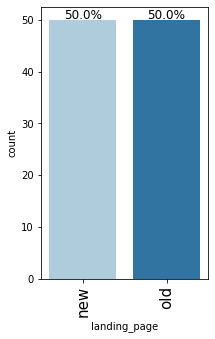

In [25]:
labeled_barplot(df,'landing_page',perc = True)

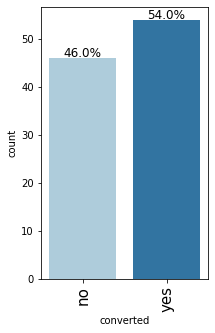

In [26]:
labeled_barplot(df,'converted',perc = True)

### Bivariate Analysis

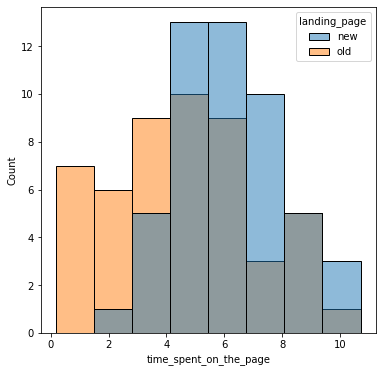

In [27]:
plt.figure(figsize=(6,6))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.show()

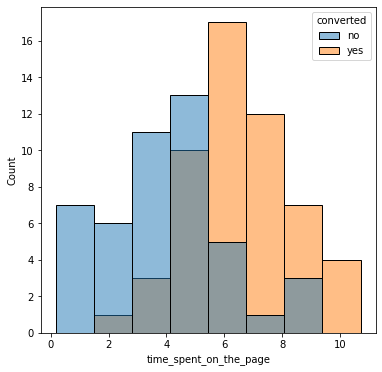

In [28]:
plt.figure(figsize=(6,6))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'converted')
plt.show()

In [29]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


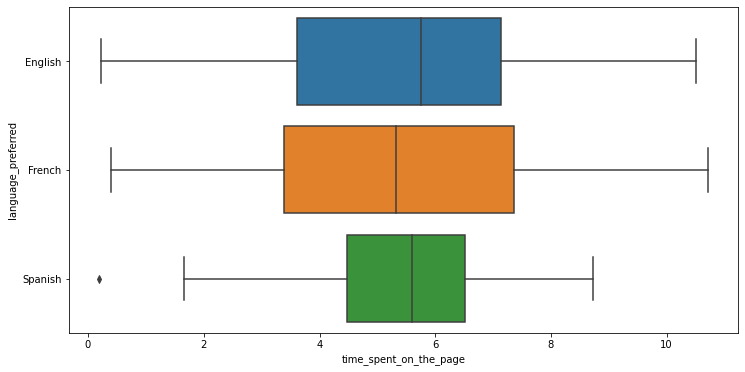

In [30]:
plt.figure(figsize=(12,6))           
sns.boxplot(df['time_spent_on_the_page'],df['language_preferred'])
plt.ylabel('language_preferred')
plt.xlabel('time_spent_on_the_page')
plt.show()

### Landing page vs Time spent on the page

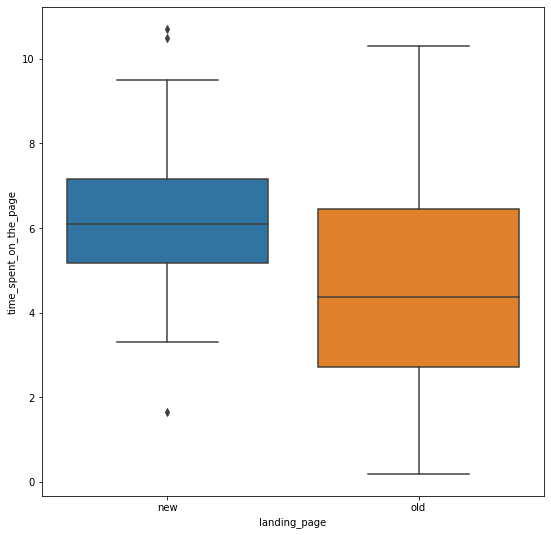

In [42]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'landing_page',y = 'time_spent_on_the_page')
plt.show()

### Conversion status vs Time spent on the page

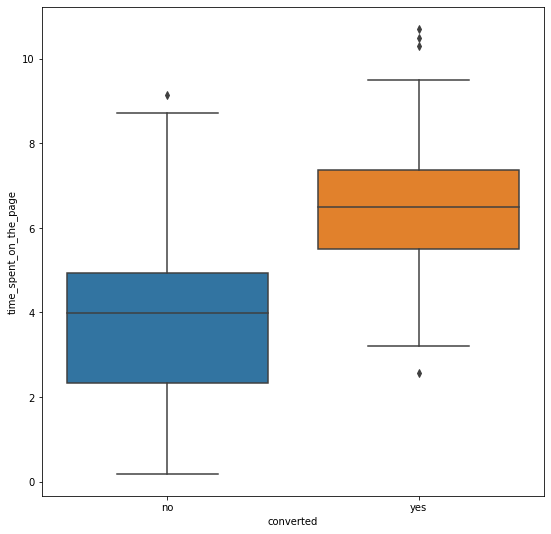

In [43]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted',y = 'time_spent_on_the_page')
plt.show()

Users who got converted seems to have spent more time on the page.

### Preferred language vs Time spent on the page

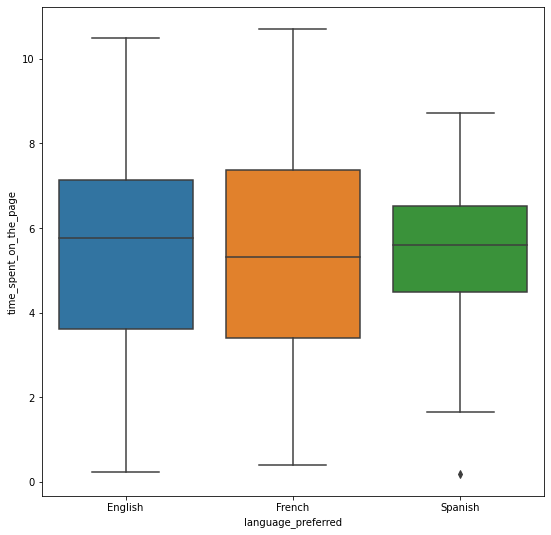

In [45]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred',y = 'time_spent_on_the_page')
plt.show()

Here only Spanish preferred page has outliers indicating people who stayed for less than a minute.

The mean time spent for all 3 languages on the page were almost same.

French preffering people had a wider range of time spent on the page when compared to the other languages.


## 2. Do the users spend more time on the new landing page than the existing landing page? 

### Perform Visual Analysis

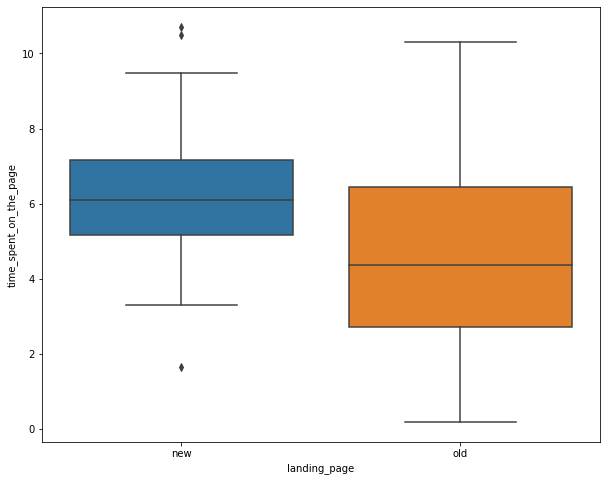

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

From the above plot, it is observed that time spent on new page were greater than that spent on old page but with a less range.

In [32]:
import scipy.stats as stats
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency

### Step 1: Define the null and alternate hypotheses

$H_0$ : Time spent by users on the new page is equal to the mean time spent by users on the old page.
       
$H_a$ : Time spent by users on the new page is greater than the mean time spent by users on the old page .

Let $\mu_1, \mu_2$ be the mean time spent by users on the new and old page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, we select the appropriate test**. So, we go ahead with sample independent t-test for this problem.

### Step 3: Decide the significance level

Consider a significance level of 0.05 for all tests.
 $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [121]:
time_spent_new = df[df['landing_page'] == 'new']
time_spent_new

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


In [122]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_new

1      7.13
2      4.40
4      4.75
6      5.25
8     10.71
12     5.86
13     6.03
15     6.27
16     8.73
22     3.65
23     7.02
24     6.18
25     4.39
26     9.49
28     7.81
30     5.41
38     1.65
42     7.16
43     7.16
44     3.91
46     5.37
47     7.23
48     8.08
49    10.50
51     5.65
52     6.47
54     6.41
57     8.30
60     6.01
61     6.79
65     7.27
68     6.70
71     5.42
72     5.08
73     7.46
77     3.88
78     9.12
80     4.68
81     5.26
82     5.74
86     6.71
87     3.68
88     3.30
90     5.40
91     8.47
93     4.94
95     5.15
97     7.07
98     6.20
99     5.86
Name: time_spent_on_the_page, dtype: float64

In [123]:
time_spent_old = df[df['landing_page'] == 'old']
time_spent_old

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English
10,546588,control,old,6.21,yes,Spanish
11,546546,control,old,2.58,yes,English
14,546578,control,old,8.72,yes,Spanish
17,546555,control,old,0.40,no,English
18,546493,control,old,10.30,yes,English


In [124]:
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
time_spent_old

0      3.48
3      3.02
5      5.28
7      6.53
9      2.08
10     6.21
11     2.58
14     8.72
17     0.40
18    10.30
19     3.88
20     2.66
21     7.03
27     4.05
29     4.28
31     3.52
32     5.39
33     4.52
34     4.46
35     8.50
36     3.13
37     6.04
39     0.19
40     8.46
41     1.92
45     8.02
50     0.22
53     4.71
55     0.93
56     1.81
58     7.40
59     9.15
62     4.18
63     5.47
64     5.96
66     6.60
67     4.75
69     2.23
70     0.40
74     4.87
75     6.57
76     1.44
79     3.21
83     2.90
84     4.30
85     0.91
89     6.04
92     8.35
94     3.05
96     6.52
Name: time_spent_on_the_page, dtype: float64

In [125]:
time_spent_new.std()

1.8170310387878263

In [126]:
time_spent_old.std()

2.581974849306046

In [127]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))

print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### Step 5: Calculate the p-value

In [128]:
from scipy.stats import ttest_ind

In [129]:
# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is '+ str(p_value))

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [130]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since we were able to reject the null hypothesis, we have statistical evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? 

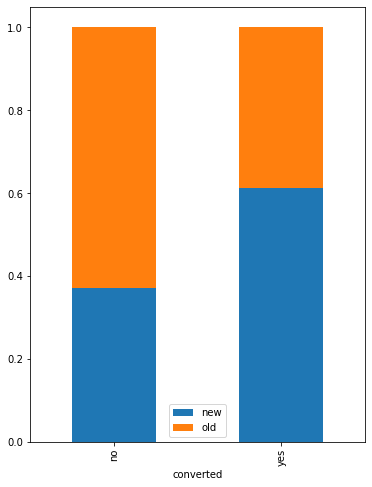

In [131]:
pd.crosstab(df['converted'], df['landing_page'], normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

From the plot, it is clear that overall, the users that get converted are more for the new page than the old page.Lets perform a hypothesis test to make sure we have statistical evidence to prove this fact. 

### Step 1: Define the null and alternate hypotheses

$H_0$ : Conversion rate for the new page is equal to the conversion rate for the old page.
       
$H_a$ : Conversion rate for the new page is greater than the conversion rate for the old page .

Let $p_1, p_2$ be the conversion rate by users on the new and old page respectively.

We will test the null hypothesis

>$H_0:p_1=p_2$

against the alternate hypothesis

>$H_a:p_1>p_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions means from two independent populations. The population standard deviations are unknown. **Based on this information, we select the appropriate test**. So, we go ahead with two proportion z-test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.  #To minimise errors

### Step 4: Collect and prepare data

In [132]:
# calculating the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculating the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 
print('The numbers of  converted users for new and old pages are {0} and {1} respectively'.format(new_converted, old_converted))

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of  converted users for new and old pages are 33 and 21 respectively
The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [133]:
from statsmodels.stats.proportion import proportions_ztest
# find the p-value
test_stat, p_value = proportions_ztest([new_converted,old_converted],[n_control,n_treatment], alternative = "larger")
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


In [134]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since we were able to reject the null hypothesis, we have statistical evidence to say that the conversion rate by the users for the new page is greater than the conversion rate by the users for the old page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

In [88]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index')

language_preferred,English,French,Spanish
converted,,,
no,0.239130,0.413043,0.347826
yes,0.388889,0.277778,0.333333


In [89]:
pd.crosstab(df['converted'],df['language_preferred'])

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


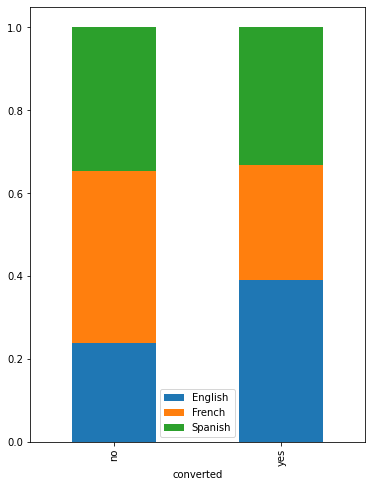

In [91]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar",figsize=(6,8),stacked=True)
plt.legend()
plt.show()

The distribution status of English and French users are not uniformly distributed.Lets perform a hypothesis test to make sure we have statistical evidence to prove if the conversion and preferred language are independent or related.

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ conversion status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ conversion status depends on preferred language.

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, we select the appropriate test.**Chi-Square Test for Independence.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [92]:
contingency_table=pd.crosstab(df['converted'], df['language_preferred'])
contingency_table                                                  

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [94]:
from scipy.stats import chi2_contingency

In [95]:
chi, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [97]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value 0.21298887487543447 is greater than the level of significance,we do not have statistical evidence to prove if the conversion and preferred language are independent or related.

## 5. Is the time spent on the new page same for the different language users? 

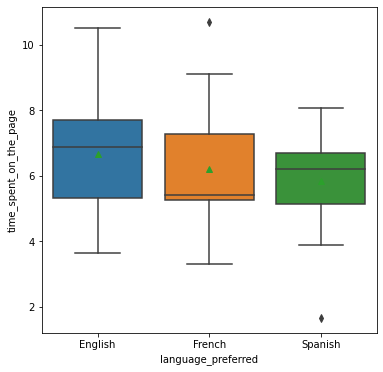

In [101]:
plt.figure(figsize=(6,6))
new_df=df[df['landing_page']=='new']
sns.boxplot(x='language_preferred',y='time_spent_on_the_page', showmeans=True,data=new_df)
plt.show()

In [103]:
new_df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

We need to see if this above difference is statistically significant or not.

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Meant time spent by all three language users are equal.

against the alternate hypothesis

>$H_a:$ At least one of the mean timenspent on the new page by English, French and Spanish users is unequal.

### Step 2: Select Appropriate test

Concerns 3 population means.Hence One-way ANOVA test is suitable providing normality and variance assumptions verified.

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on new page will follow a normal distribution 

against the alternative hypothesis

>$H_a:$  Time spent on new page  does not follow a normal distribution

In [105]:
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Hence we fail to reject the null hypothesis that the response follows the normal distribution as p-value is greater than 0.05.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [116]:
from scipy.stats import levene
statistic, p_value = levene( new_df[new_df['language_preferred']=="English"]['time_spent_on_the_page'], 
                             new_df[new_df['language_preferred']=="French"]['time_spent_on_the_page'], 
                             new_df[new_df['language_preferred']=="Spanish"]['time_spent_on_the_page'])
                                    
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Here too, null hypothesis is failed to be rejected.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [118]:
time_spent_English = new_df[new_df['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French =  new_df[new_df['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = new_df[new_df['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [119]:
from scipy.stats import f_oneway 

test_stat, p_value =    f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with  𝛼

In [120]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Hence we do not have any statistical evidence to say that the mean times spent by all three language users differ by a meaningful degree.

## Conclusion and Business Recommendations

**Conclusions:**
1.Users spent more time on the new page.

2.Conversion rate of new page is greater than that of old page.
    
3.Conversion status is independent of preferred language.    

**Recommendations:**
   Should use the new landing page to gather more subscribers.
   
   Also the more time a person spents on the site,the more likely for he/she converts.So design the page in a way that they stay for more and longer.Conversion will follow eventually.
   
   A great landing page focuses on a single conversion goal, so minimize other distractions that might carry visitors away.
    Resist the urge to include unnecessary links away from your landing page, including site navigation, additional calls to action, 
    or even links back to your homepage. 
    Your landing page will work best if it stands alone.